
# PROJECT 1 (AVIATION_DATA)

# 1.INTRODUCTION




When it comes to the aviation business, safety and reliability are critical when selecting aircraft for business use. With numerous makes and model available it needs a through search for the best aircraft so that one can start their business.



# Business Understanding
The project uses a dataset of aviation accident and it reports analyze patterns accross aircraft makes, engine type, flight phases and injury severity. By identifying which aircraft are most frequently involved in accidents and what were the causes of these accidents.

The goal is to help the company choose aircraft that offers a strong record of safety for the passengers, good consistency perfomance and low long-term operational risk.

# Objective
Find the best aircraft make for the company.


# 2.Data Understanding
For the research we collected the aviation data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


# load the Dataset with Pandas
Import


Pandas with the standard alias pd

Then you import the file from google colab after that you upload it.

After that you set the file name you want to load and then the code that you will write after that will read the .csv file into a pandas Dataframe and the function pd.read() is the function that loads the file. We  coded 'latin1' because the file had special characters that can mess up the data. Then the next code will convert the entire Data Frame into a list of dictonaries.











In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving AviationData.csv to AviationData.csv


In [3]:
file_name = 'AviationData.csv'
travel_df = pd.read_csv(file_name, encoding='latin1')
Aviation = travel_df.to_dict('records')

/tmp/ipython-input-3-472971016.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  travel_df = pd.read_csv(file_name, encoding='latin1')


In [4]:
Aviation

[{'Event.Id': '20001218X45444',
  'Investigation.Type': 'Accident',
  'Accident.Number': 'SEA87LA080',
  'Event.Date': '1948-10-24',
  'Location': 'MOOSE CREEK, ID',
  'Country': 'United States',
  'Latitude': nan,
  'Longitude': nan,
  'Airport.Code': nan,
  'Airport.Name': nan,
  'Injury.Severity': 'Fatal(2)',
  'Aircraft.damage': 'Destroyed',
  'Aircraft.Category': nan,
  'Registration.Number': 'NC6404',
  'Make': 'Stinson',
  'Model': '108-3',
  'Amateur.Built': 'No',
  'Number.of.Engines': 1.0,
  'Engine.Type': 'Reciprocating',
  'FAR.Description': nan,
  'Schedule': nan,
  'Purpose.of.flight': 'Personal',
  'Air.carrier': nan,
  'Total.Fatal.Injuries': 2.0,
  'Total.Serious.Injuries': 0.0,
  'Total.Minor.Injuries': 0.0,
  'Total.Uninjured': 0.0,
  'Weather.Condition': 'UNK',
  'Broad.phase.of.flight': 'Cruise',
  'Report.Status': 'Probable Cause',
  'Publication.Date': nan},
 {'Event.Id': '20001218X45447',
  'Investigation.Type': 'Accident',
  'Accident.Number': 'LAX94LA336',
  '

# Checking the Structure of the Data
Here we are able to understand what we are working with before we start cleaning the data and and analyzing it.


We checked for the shape, columns, head and info

In [5]:
travel_df.shape

(88889, 31)

In [6]:
travel_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
travel_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [43]:
travel_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'airport_code', 'airport_name',
       'injury_severity', 'aircraft_damage', 'registration_number', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date'],
      dtype='object')

In [44]:
travel_df.describe()

,event_date,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,74312,74312.000000,74312.000000,74312.000000,74312.000000,74312.000000
mean,2001-12-11 05:30:59.489719040,1.065144,0.561915,0.247847,0.300126,4.882522
min,1962-07-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992-09-03 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2001-04-14 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2010-12-02 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,171.000000,699.000000
std,NaN,0.511256,5.106977,1.525995,1.544787,26.180435


# Removing Of Duplicates In the Data
Here we are removing rows in our data that are exactly the same or have repeated values in certain important columns and it's important because duplicates can make your visualization or machine learning models inaccurate and distort averages and counts.

In [9]:
travel_df.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
duplicate_rows = travel_df[travel_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [11]:
duplicate_rows.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [12]:
event_id_duplicates = travel_df[travel_df.duplicated(subset='Event.Id')]
print(f"Number of duplicate Event.Ids: {event_id_duplicates.shape[0]}")
event_id_duplicates.head()

Number of duplicate Event.Ids: 938


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
160,20020917X02259,Accident,LAX82FA049B,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Cruise,Probable Cause,23-01-1983
245,20020917X02585,Accident,SEA82DA028B,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
248,20020917X02173,Accident,LAX82DA065A,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983


In [13]:
travel_df = travel_df.drop_duplicates(subset='Event.Id', keep='first')

In [14]:
print("Remaining duplicate Event.Id", travel_df.duplicated(subset='Event.Id').sum())

Remaining duplicate Event.Id 0


# Cleaning Values in the Data
Here we are fixing parts of the dataset that are innacurate and incomplete so that we can our visualization are correct.

You can see the codes down below.

In [15]:
travel_df.isnull().sum().sort_values(ascending=False)

,0
Schedule,75591
Air.carrier,71418
FAR.Description,56036
Aircraft.Category,55770
Longitude,53748
Latitude,53739
Airport.Code,38467
Airport.Name,35920
Broad.phase.of.flight,27114
Publication.Date,13599


In [16]:
threshold = len(travel_df) * 0.5
travel_df = travel_df.dropna(axis=1, thresh=threshold)

In [17]:
Categorical_columns = [
    'Weather.Condition', 'Airport.Code', 'Airport.name', 'Aircraft.Damage',
    'Engine.Type', 'Purpose.of.flight', 'Report.Status', 'Injury.Severity',
    'Amateur.Built' 'Broad.Phase.of.Flight', 'Report.Status'
]

In [18]:
for columns in Categorical_columns:
  if columns in travel_df.columns:
    if travel_df[columns].dtype.name == 'category':
      if 'Unknown' not in travel_df[columns].cat.categories:
        travel_df[columns] = travel_df[columns].cat.add_categories(['Unknown'])
        travel_df[columns] = travel_df[columns]. fillna('Unknown')

In [19]:
numerical_columns = [
    'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured', 'Number.of.Engines',
]

In [20]:
for columns in numerical_columns:
  if columns in travel_df.columns:
    travel_df[columns] =travel_df[columns].fillna(0)

/tmp/ipython-input-20-232866148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_df[columns] =travel_df[columns].fillna(0)


In [21]:
critical_columns = ['Location', 'Event.Date', 'Country' 'Airport.Name', 'Publication.Date']


In [22]:
for columns in critical_columns:
  if columns in travel_df.columns:
    travel_df = travel_df.dropna(subset=[columns])

In [23]:
columns_to_fill = ['Regiristration.Number', 'Country', 'Model', 'Make']
for columnsn in columns_to_fill:
  travel_df[columns]= travel_df[columns].fillna('Unknown')

In [24]:
columns_to_fill = ['Registration.Number', 'Make', 'Model', 'Country']
for columns in columns_to_fill:
  travel_df[columns] = travel_df[columns].fillna('Unknown')

In [25]:
travel_df[['Registration.Number', 'Country', 'Model', 'Make']].isnull().sum()

,0
Registration.Number,0
Country,0
Model,0
Make,0


In [26]:
travel_df.isnull().sum().sort_values(ascending=False)

,0
Airport.Code,31546
Airport.Name,29853
Broad.phase.of.flight,25761
Engine.Type,5898
Report.Status,5344
Purpose.of.flight,5336
Weather.Condition,3595
Aircraft.damage,2566
Injury.Severity,729
Amateur.Built,86


In [27]:
travel_df['Airport.Name'] = travel_df['Airport.Name'].fillna('Unknown')
travel_df['Broad.phase.of.flight'] = travel_df['Broad.phase.of.flight'].fillna('Unknown')

In [28]:
travel_df['Airport.Code'] = travel_df['Airport.Code'].fillna('Unknown')
travel_df['Engine.Type'] = travel_df['Engine.Type'].fillna('Unknown')
travel_df['Report.Status'] = travel_df['Report.Status'].fillna('Unknown')
travel_df['Purpose.of.flight'] = travel_df['Purpose.of.flight'].fillna('Unknown')
travel_df['Weather.Condition'] = travel_df['Weather.Condition'].fillna('Unknown')
travel_df['Aircraft.damage'] = travel_df['Aircraft.damage'].fillna('Unknown')



In [29]:
travel_df.isnull().sum().sort_values(ascending=False)

,0
Injury.Severity,729
Amateur.Built,86
Event.Id,0
Event.Date,0
Investigation.Type,0
Location,0
Country,0
Airport.Code,0
Accident.Number,0
Airport.Name,0


# Fixing Incorrect Types
Here we were converting columns in our dataset to the correct format and we were making sure Dates are actually datetime and numbers are intergers or floats.

In [30]:
travel_df.dtypes

,0
Event.Id,object
Investigation.Type,object
Accident.Number,object
Event.Date,object
Location,object
Country,object
Airport.Code,object
Airport.Name,object
Injury.Severity,object
Aircraft.damage,object


In [31]:
travel_df['Event.Date'] = pd.to_datetime(travel_df['Event.Date'], errors='coerce')

In [32]:
Categorical_columns = [
    'Injury.Severity', 'Engine.Type', 'Aircraft.damage', 'Amateur.Built', 'Country'
]

In [33]:
for columns in Categorical_columns:
  travel_df[columns] = travel_df[columns].astype('category')

In [34]:
travel_df.dtypes

,0
Event.Id,object
Investigation.Type,object
Accident.Number,object
Event.Date,datetime64[ns]
Location,object
Country,category
Airport.Code,object
Airport.Name,object
Injury.Severity,category
Aircraft.damage,category


# Cleaning confusing Columns Names
This helps to make our dataset easier to read and easy to work with.

In [35]:
print(travel_df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [36]:
travel_df.columns = (
    travel_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('.', '_')
    .str.replace('\n', '')
)

In [37]:
print(travel_df.columns.tolist())

['event_id', 'investigation_type', 'accident_number', 'event_date', 'location', 'country', 'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage', 'registration_number', 'make', 'model', 'amateur_built', 'number_of_engines', 'engine_type', 'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'weather_condition', 'broad_phase_of_flight', 'report_status', 'publication_date']


# Causes of accidents by flight phase
Here we wanted to check how often accidents happen during each major phase of flight and what are the causes associated with those phases.





In [38]:
print(travel_df['broad_phase_of_flight'].value_counts())

broad_phase_of_flight
Unknown        26160
Landing        12255
Takeoff         9858
Cruise          8072
Maneuvering     6411
Approach        5103
Climb           1626
Descent         1522
Taxi            1440
Go-around       1056
Standing         721
Other             88
Name: count, dtype: int64


# Top engine Types
Here we were checking the engine type with the highest number of use and from the codes below we could see that the reciprocating one had the highest number.

In [39]:
print(travel_df['engine_type'].value_counts())

engine_type
Reciprocating      57935
Unknown             7439
Turbo Shaft         3112
Turbo Prop          3044
Turbo Fan           2189
Turbo Jet            565
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64


# Known Manufactures In the Aircraft Business
Here we able to find Manufactures with the highest number of users.

In [40]:
print(travel_df['make'].value_counts().head(20))

make
Cessna               17417
Piper                 9449
CESSNA                4691
Beech                 3468
PIPER                 2722
Bell                  1692
Boeing                1259
BEECH                 1004
BOEING                 997
Robinson               868
Mooney                 866
Grumman                806
Bellanca               661
Hughes                 642
BELL                   554
Air Tractor            551
Schweizer              515
Mcdonnell Douglas      421
Aeronca                390
Maule                  362
Name: count, dtype: int64


# Make of Plane With the Highest Number Of Accidents
 We imported matplotlib.pyplot as plt to create visualization then imported seaborn as sns which helps in creating statistical charts with very little code.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
make_counts = travel_df['make'].value_counts().head(10)


/tmp/ipython-input-50-3304293426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.values, y=make_counts.index,palette='flare')


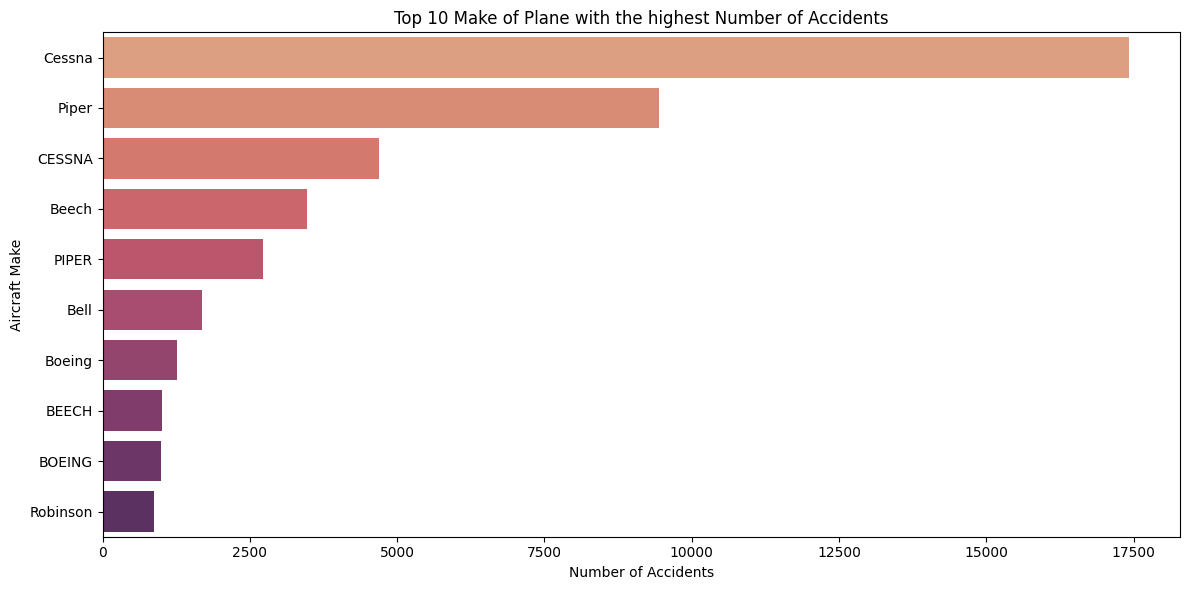

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=make_counts.values, y=make_counts.index,palette='flare')
plt.title('Top 10 Make of Plane with the highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.tight_layout()
plt.show()

# Graph of the Safest Aircraft Makes

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
severity_map = {
    'None': 0,
    'Minor': 1,
    'Serious': 2,
    'Fatal': 3,
    'Destroyed':4,
}

In [53]:
travel_df['severity_level'] = travel_df['injury_severity'].map(severity_map)
df_filtered = travel_df.dropna(subset=['make','severity_level'])


In [54]:
make_stats= df_filtered.groupby('make').agg(avg_severity=('severity_level', 'mean'), total_reports=('severity_level', 'count')).reset_index()

In [55]:
safe_makes = make_stats[make_stats['total_reports'] >= 30].sort_values('avg_severity').head(10)

/tmp/ipython-input-56-1149955116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_severity', y='make', data=safe_makes, palette='crest')


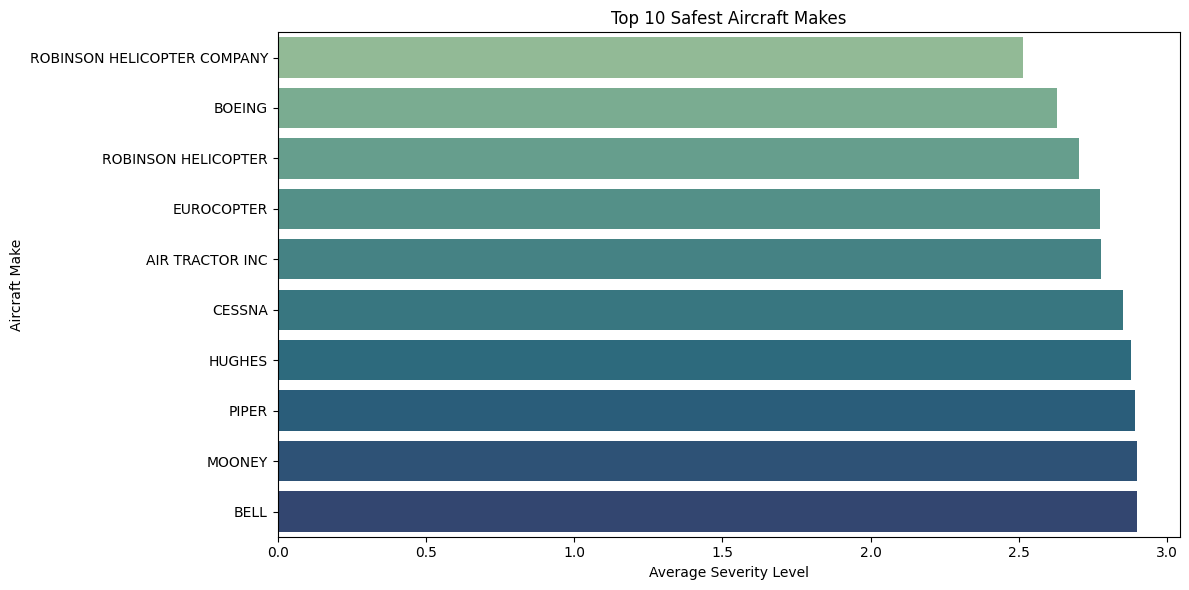

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_severity', y='make', data=safe_makes, palette='crest')
plt.xlabel('Average Severity Level')
plt.ylabel('Aircraft Make')
plt.title('Top 10 Safest Aircraft Makes')
plt.tight_layout()
plt.show()

# Histogram on the best Engine Type

In [57]:
import matplotlib.pyplot as plt


In [58]:
severity_map = {
    'None': 0,
    'Minor': 1,
    'Serious': 2,
    'Fatal': 3,
    'Destroyed':4,
}


In [59]:
travel_df['severity_level'] = travel_df['injury_severity'].map(severity_map)


# Best Engine Type

/tmp/ipython-input-60-334500990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engine_severity = engine_df.groupby('engine_type')['severity_level'].mean().sort_values()


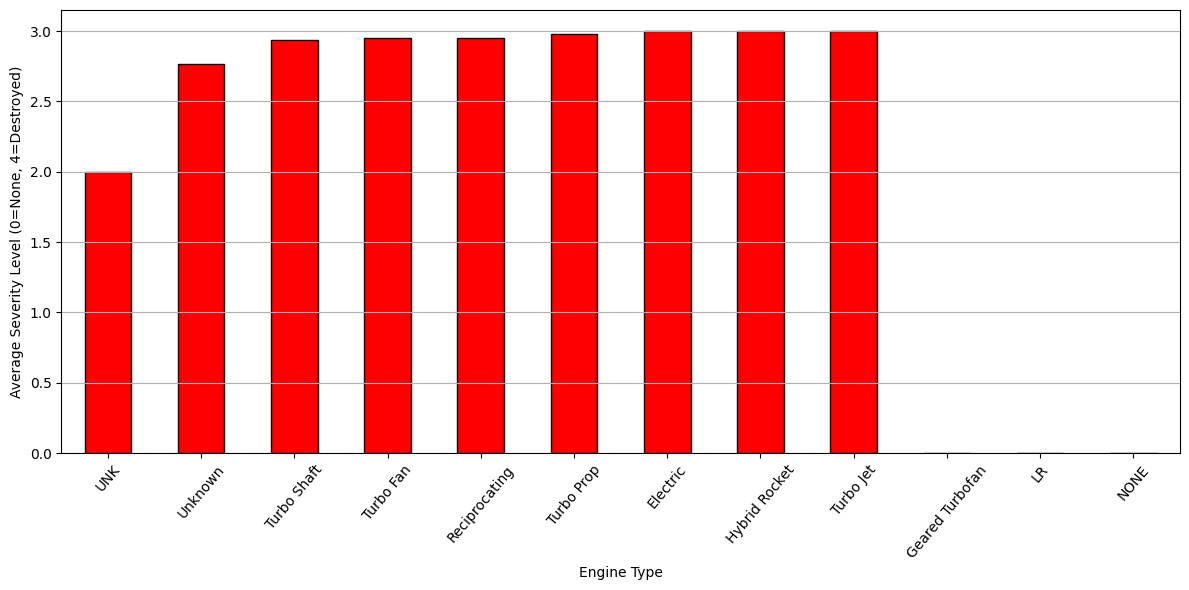

In [60]:
engine_df = travel_df.dropna(subset=['engine_type', 'severity_level'])
engine_severity = engine_df.groupby('engine_type')['severity_level'].mean().sort_values()
plt.figure(figsize=(12, 6))
engine_severity.plot(kind='bar', color='Red', edgecolor='black')
plt.xlabel('Engine Type')
plt.ylabel('Average Severity Level (0=None, 4=Destroyed)')
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Fatal Injuries by Aircraft Make

make
Cessna               5949.0
Boeing               5033.0
Piper                4279.0
Beech                2408.0
BOEING               2146.0
CESSNA               1845.0
AIRBUS               1212.0
PIPER                1205.0
Mcdonnell Douglas    1035.0
Airbus Industrie      855.0
Douglas               823.0
BEECH                 798.0
Bell                  747.0
Mooney                426.0
Tupolev               420.0
BELL                  373.0
Robinson              295.0
Aerospatiale          277.0
ROBINSON              258.0
Embraer               253.0
Name: total_fatal_injuries, dtype: float64


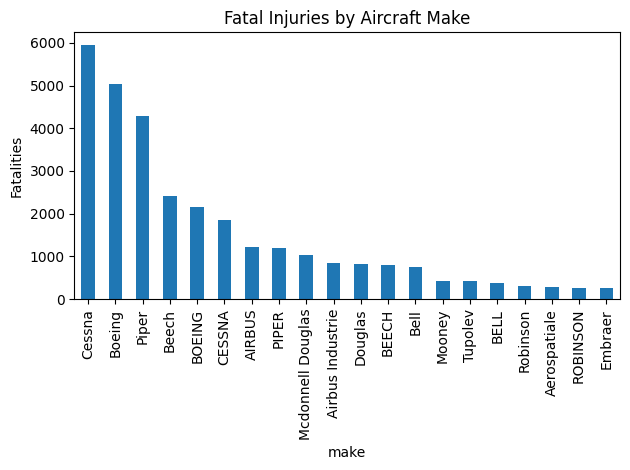

In [61]:
fatal_by_make = (
    travel_df.groupby('make')['total_fatal_injuries']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
print(fatal_by_make)
fatal_by_make.plot(kind='bar', title='Fatal Injuries by Aircraft Make', ylabel='Fatalities')
plt.tight_layout()
plt.show()


# How to know the best Aircraft to purchase


In [62]:
import matplotlib.pyplot as plt


In [63]:
make_counts = travel_df['make'].value_counts()
common_makes = make_counts[make_counts >= 50].index
fatalities_by_make = (
    travel_df[travel_df['make'].isin(common_makes)]
    .groupby('make')['total_fatal_injuries']
    .sum()
    .sort_values()
    .head(10)
)

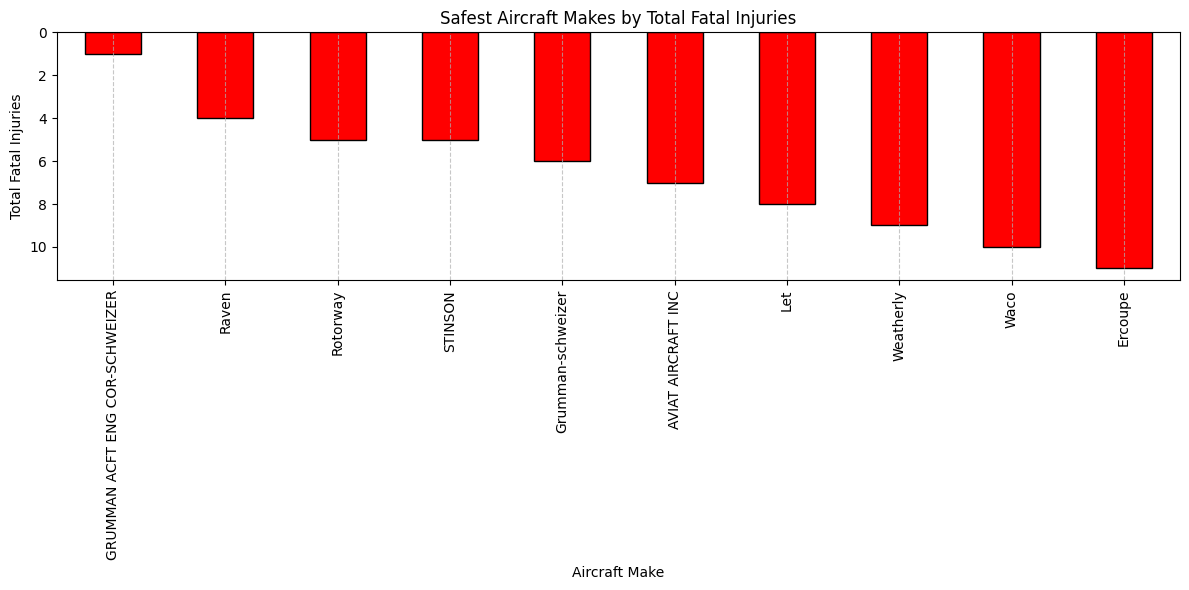

In [64]:
plt.figure(figsize=(12, 6))
fatalities_by_make.plot(kind='bar', color='Red', edgecolor='black')
plt.title('Safest Aircraft Makes by Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Aircraft makes with the Highest Number of Passengers
Here we first imported matplot.lib as plt because we wanted to create a visualization.

After that coded make_counts which selected the Make column from our dataset then we wrote 'value_count()' which counts how many times each make appears, plt.figure creates a bar chart and sets the chart size and also gives it a title. The 'make_counts.plot' as from the code helped us to tell pandas what type of chart to draw and the color.'Plt.xtick' the function sets the position and labels of the ticks along the x axis.


In [65]:
import matplotlib.pyplot as plt


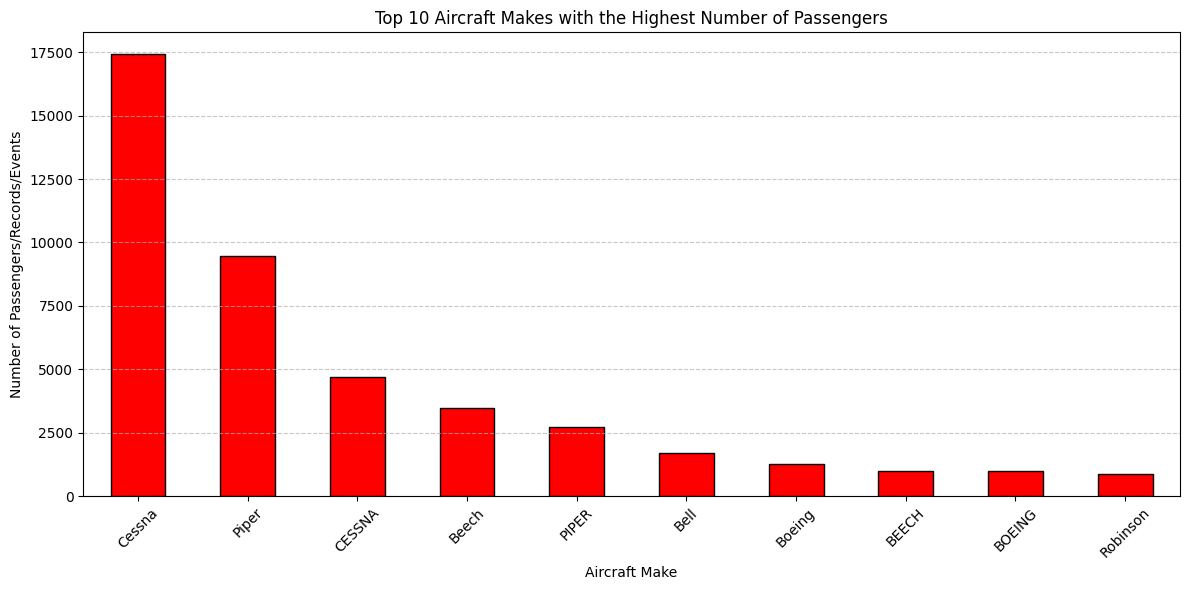

In [66]:
make_counts = travel_df['make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Aircraft Makes with the Highest Number of Passengers')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Passengers/Records/Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# conclusion and recommendations
From this analysis were able to find that Cesna the aircraft manufacturer had the higest number when it comes to fatal injuries by aircraft makes. Cesna also had the highest number of passengers from all the aircraft makes.

We also found out that the safest aircraft make is the GRUMAN ACFT ENG COR-SCHWEIZERC beacuse we can see from the data plot that it had the lowest total fatal injuries.

The safest aircraft make are between ROBINSON HELICOPTER COMPANY AND BOIENG
because from our data plot we say the two Makes had a low average severity level but the Robinson helicopter company will only favour the company if we wanted to buy a small flexible aircraft for tourism.

The BOEING Aircraft company was the one which I would highly recommend because it favours the interest of the company to do commercial business and this is because the BOEING company makes safer and large-scale operation Aircrafts.